In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.io as sio

In [66]:
img = sio.loadmat('../data/image_low_frequency_noise.mat')
result = img.items()
data = list(result)
img = np.array(data)[3][1]
img = (img - np.min(img))/(np.max(img)-np.min(img))

Text(0.45, 0, 'noise image')

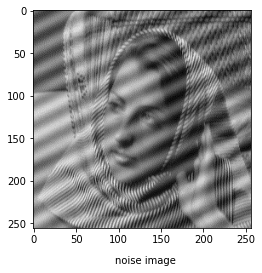

In [67]:
plt.imshow(img, cmap='gray')
plt.figtext(0.45,0,'noise image')

Text(0.4, 0, 'FFT of noise image')

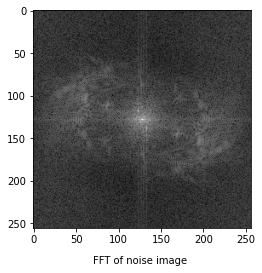

In [68]:
f = np.fft.fft2(np.float32(img))
f_shift = np.fft.fftshift(f)
f_complex = f_shift
f_abs = np.abs(f_complex)+1 # lie between 1 and 1e6
f_bounded = np.log(f_abs)
f_img = (f_bounded-np.min(f_bounded)) / (np.max(f_bounded) - np.min(f_bounded))
f_img = f_img.astype(np.float32)
plt.imshow(f_img, cmap='gray')
plt.figtext(0.4,0,'FFT of noise image')

we observe very bright points at (118,131) and (138,123) and at center(128,128). Placing notches at those points will be helpful for notch filtering.

Text(0.45, 0, 'filtered image')

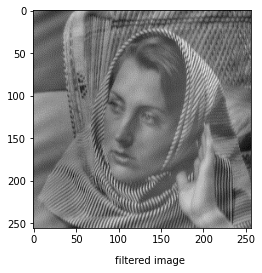

In [69]:
x = 10
y = 5
a,b = np.int(f_img.shape[0]/2),np.int(f_img.shape[1]/2)
filter = np.ones(img.shape)
filter[a-x-1:a-x+2,b-y-1:b-y+2] = 0
filter[a+x-1:a+x+2,b+y-1:b+y+2] = 0
filter[a-1:a+2,b-1:b+2] = 0
lpf_filter40 = filter.copy()
flt_img = f_complex*filter
flt_img = np.fft.ifftshift(flt_img)
flt_img = np.real(np.fft.ifft2(flt_img))
plt.imshow(flt_img, cmap='gray')
plt.figtext(0.45,0,'filtered image')

Notch filtered image with notch in filter with 3 pixels width at center and (-10,5) and (10,-5) from center of filter i.e. at (118,131) and (138,123) and at center(128,128)